Descriptive Statistics:
Number of responses: 10
Mean: 4.40
Median: 4.5
Mode: 5
Standard Deviation: 0.70

One-sample t-test:
T-statistic: 6.33
P-value: 0.0001
✅ The result is statistically significant: users generally agreed the interface helped.


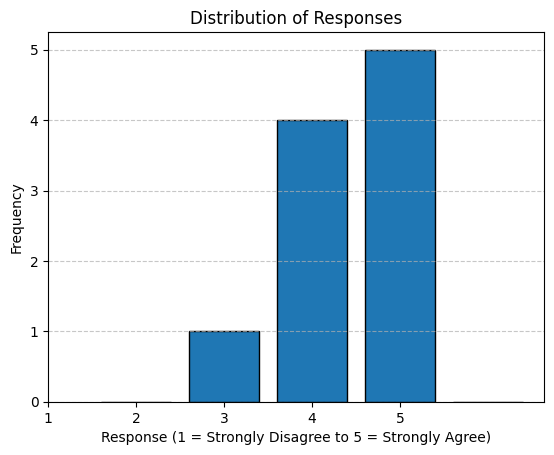

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Load the CSV file
file_path = "LLM Interface Usability Survey (Antworten) - Formularantworten 1.csv"
df = pd.read_csv(file_path)

# Step 1: Extract relevant column
response_col = "To what extent do you agree with the statement: “The interface helped me express my needs better than if I had typed a prompt myself”?"
responses_raw = df[response_col].dropna()

# Step 2: Map text responses to numeric values
response_map = {
    "Strongly disagree": 1,
    "Disagree": 2,
    "Neutral": 3,
    "Agree": 4,
    "Strongly agree": 5
}
responses_numeric = responses_raw.map(response_map)

# Step 3: Descriptive statistics
mean_val = responses_numeric.mean()
median_val = responses_numeric.median()
mode_val = responses_numeric.mode().iloc[0]
std_dev = responses_numeric.std(ddof=1)

print("Descriptive Statistics:")
print(f"Number of responses: {len(responses_numeric)}")
print(f"Mean: {mean_val:.2f}")
print(f"Median: {median_val}")
print(f"Mode: {mode_val}")
print(f"Standard Deviation: {std_dev:.2f}")

# Step 4: One-sample t-test against neutral value (3)
t_stat, p_value = stats.ttest_1samp(responses_numeric, popmean=3)

print("\nOne-sample t-test:")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("✅ The result is statistically significant: users generally agreed the interface helped.")
else:
    print("❌ No statistical evidence that the interface helped more than neutral.")

# Step 5: Optional – plot response distribution
plt.hist(responses_numeric, bins=np.arange(1.5, 6.6, 1), edgecolor='black', rwidth=0.8, align='mid')
plt.title("Distribution of Responses")
plt.xlabel("Response (1 = Strongly Disagree to 5 = Strongly Agree)")
plt.ylabel("Frequency")
plt.xticks([1, 2, 3, 4, 5])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


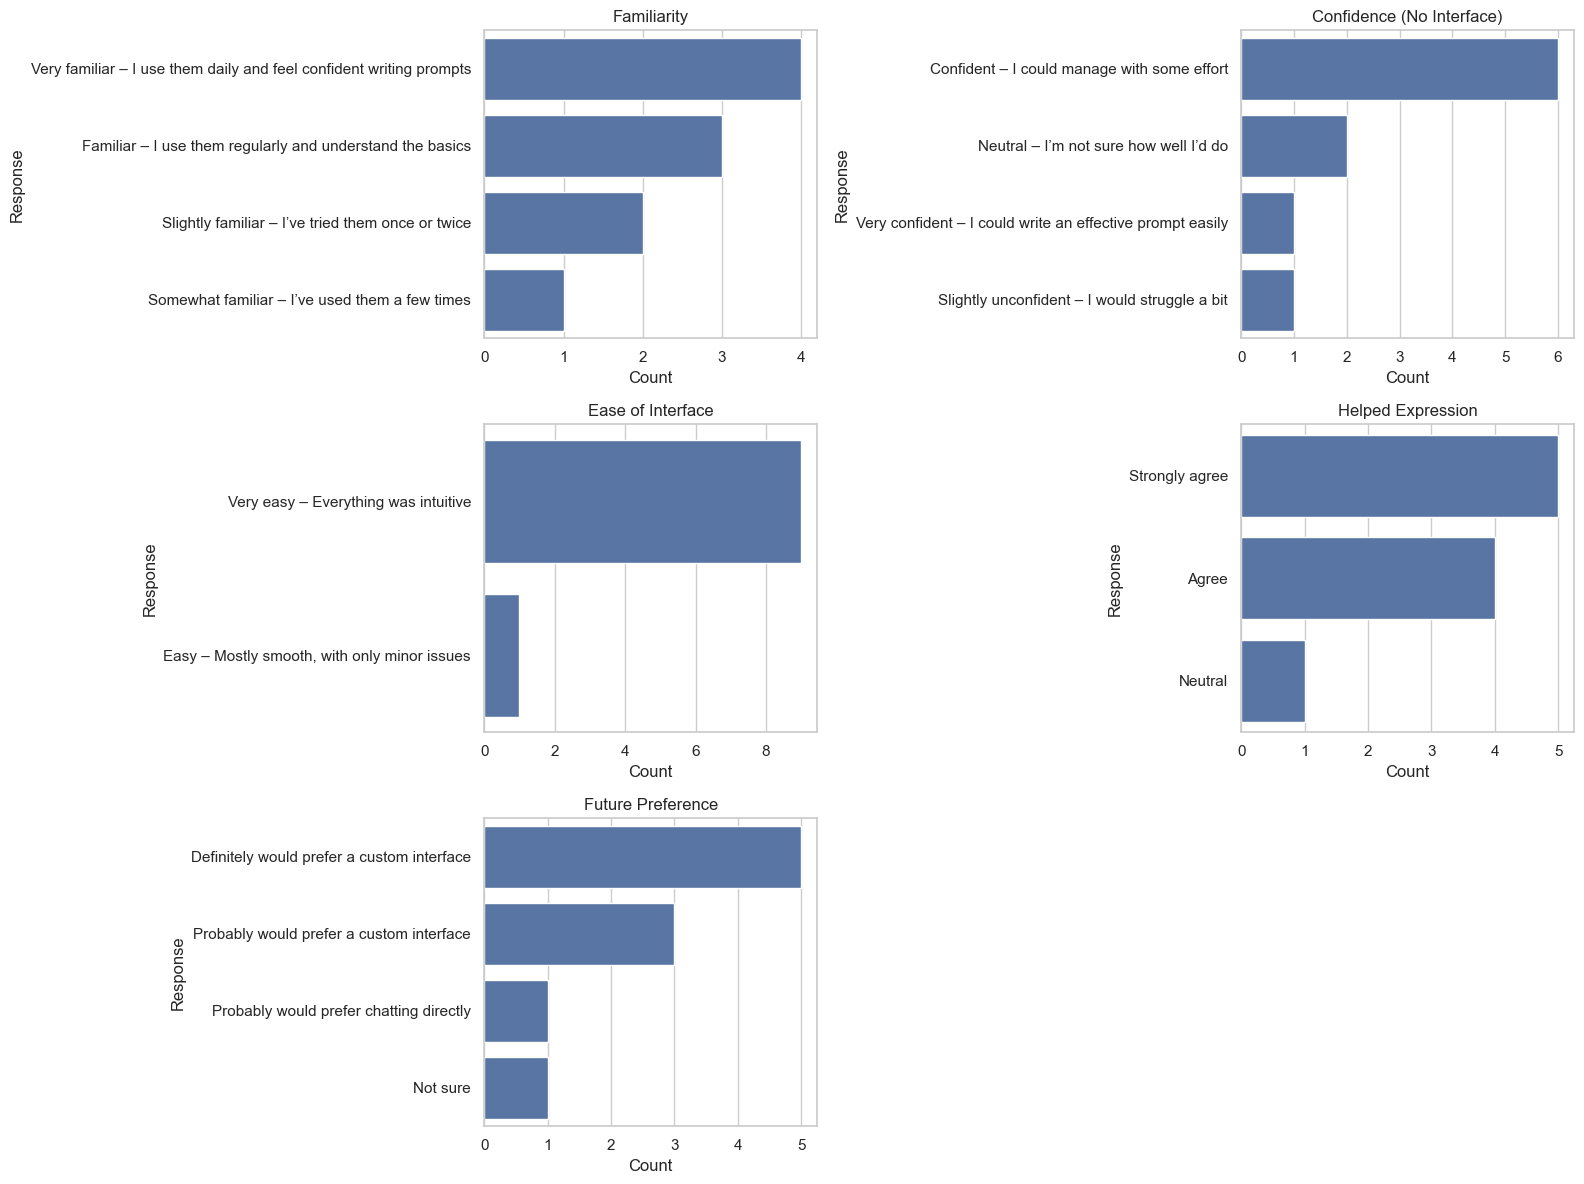

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set visual style
sns.set(style="whitegrid")

# Clean column names for readability
df_clean = df.rename(columns={
    "How familiar are you with using tools like ChatGPT or other large language models (LLMs)?": "Familiarity",
    "If you were asked to get a recipe suggestion from an LLM without a custom interface, how confident would you feel about writing a prompt?": "Confidence (No Interface)",
    "How easy or difficult was it to use our interface to get a recipe suggestion?": "Ease of Interface",
    "To what extent do you agree with the statement: “The interface helped me express my needs better than if I had typed a prompt myself”?": "Helped Expression",
    "In the future, would you prefer using a custom interface like this over chatting directly with an LLM for similar tasks?": "Future Preference"
})

# Plot count plots for all Likert-type questions
fig, axes = plt.subplots(3, 2, figsize=(16, 12))
axes = axes.flatten()
columns_to_plot = ["Familiarity", "Confidence (No Interface)", "Ease of Interface", "Helped Expression", "Future Preference"]

for i, col in enumerate(columns_to_plot):
    sns.countplot(y=col, data=df_clean, order=df_clean[col].value_counts().index, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel("Count")
    axes[i].set_ylabel("Response")

# Hide unused subplot if any
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [6]:
import pandas as pd
import numpy as np
from scipy import stats

# Load the CSV file
file_path = "LLM Interface Usability Survey (Antworten) - Formularantworten 1.csv"
df = pd.read_csv(file_path)

# Extract the relevant column
response_col = "To what extent do you agree with the statement: “The interface helped me express my needs better than if I had typed a prompt myself”?"
responses_raw = df[response_col].dropna()

# Map Likert responses to numerical values
response_map = {
    "Strongly disagree": 1,
    "Disagree": 2,
    "Neutral": 3,
    "Agree": 4,
    "Strongly agree": 5
}
responses_numeric = responses_raw.map(response_map)

# Subtract the hypothesized median (3)
differences = responses_numeric - 3

# Apply the Wilcoxon signed-rank test (testing if median > 3)
wilcoxon_stat, wilcoxon_p = stats.wilcoxon(differences, alternative='greater')

# Output the result
print("Wilcoxon Signed-Rank Test")
print(f"Number of responses: {len(responses_numeric)}")
print(f"Test Statistic: {wilcoxon_stat}")
print(f"P-value: {wilcoxon_p:.4f}")

if wilcoxon_p < 0.05:
    print("✅ Statistically significant: median response is greater than neutral (3)")
else:
    print("❌ Not statistically significant: cannot conclude median > 3")


Wilcoxon Signed-Rank Test
Number of responses: 10
Test Statistic: 45.0
P-value: 0.0020
✅ Statistically significant: median response is greater than neutral (3)


/var/folders/dm/7tk9f04d6qx5f7hkq1mrhs8m0000gn/T/ipykernel_51165/3159443372.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=response_counts.index, y=response_counts.values, palette="viridis")


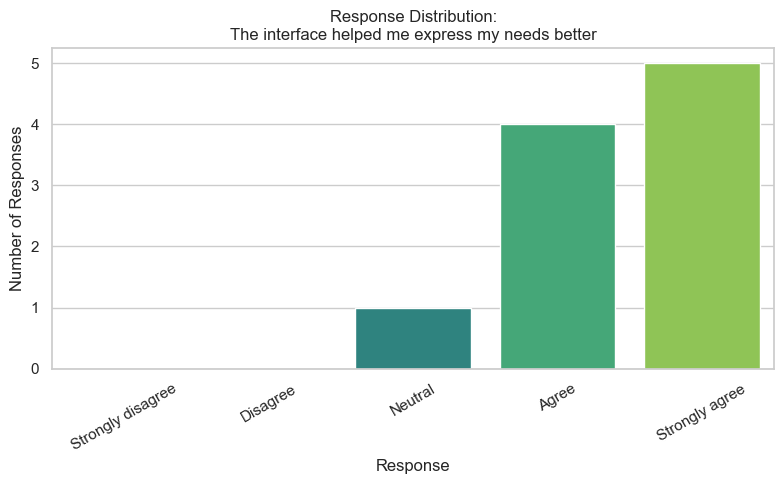


Shapiro-Wilk Test for Normality
Test Statistic: 0.7809
P-value: 0.0085
❌ The data is NOT normally distributed.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Step 1: Load the CSV file
file_path = "LLM Interface Usability Survey (Antworten) - Formularantworten 1.csv"
df = pd.read_csv(file_path)

# Step 2: Extract and clean the relevant column
response_col = "To what extent do you agree with the statement: “The interface helped me express my needs better than if I had typed a prompt myself”?"
responses_raw = df[response_col].dropna()

# Step 3: Map responses to numeric values
response_map = {
    "Strongly disagree": 1,
    "Disagree": 2,
    "Neutral": 3,
    "Agree": 4,
    "Strongly agree": 5
}
responses_numeric = responses_raw.map(response_map)

# Step 4: Bar chart with all Likert categories, even unselected
all_likert_labels = ["Strongly disagree", "Disagree", "Neutral", "Agree", "Strongly agree"]
response_counts = responses_raw.value_counts().reindex(all_likert_labels, fill_value=0)

plt.figure(figsize=(8, 5))
sns.barplot(x=response_counts.index, y=response_counts.values, palette="viridis")
plt.title("Response Distribution:\nThe interface helped me express my needs better")
plt.ylabel("Number of Responses")
plt.xlabel("Response")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Step 5: Shapiro-Wilk test for normality
shapiro_stat, shapiro_p = stats.shapiro(responses_numeric)

print("\nShapiro-Wilk Test for Normality")
print(f"Test Statistic: {shapiro_stat:.4f}")
print(f"P-value: {shapiro_p:.4f}")
if shapiro_p > 0.05:
    print("✅ The data is likely normally distributed.")
else:
    print("❌ The data is NOT normally distributed.")


In [8]:
# Step 6: Shapiro-Wilk test for normality for "Future Preference"
response_col_future = "In the future, would you prefer using a custom interface like this over chatting directly with an LLM for similar tasks?"
responses_raw_future = df[response_col_future].dropna()

# Map text responses to numeric values
response_map_future = {
    "Definitely would prefer chatting directly": 1,
    "Probably would prefer chatting directly": 2,
    "Not sure": 3,
    "Probably would prefer a custom interface": 4,
    "Definitely would prefer a custom interface": 5
}
responses_numeric_future = responses_raw_future.map(response_map_future)

# Perform Shapiro-Wilk test
shapiro_stat_future, shapiro_p_future = stats.shapiro(responses_numeric_future)

print("\nShapiro-Wilk Test for Normality (Future Preference)")
print(f"Test Statistic: {shapiro_stat_future:.4f}")
print(f"P-value: {shapiro_p_future:.4f}")
if shapiro_p_future > 0.05:
    print("✅ The data is likely normally distributed.")
else:
    print("❌ The data is NOT normally distributed.")


Shapiro-Wilk Test for Normality (Future Preference)
Test Statistic: 0.7914
P-value: 0.0114
❌ The data is NOT normally distributed.


In [9]:
# Step 8: Wilcoxon Signed-Rank Test for "Future Preference"
response_col_wilcoxon = "In the future, would you prefer using a custom interface like this over chatting directly with an LLM for similar tasks?"
responses_raw_wilcoxon = df[response_col_wilcoxon].dropna()

# Map detailed text responses to numeric values
response_map_wilcoxon = {
    "Definitely would prefer a custom interface": 5,
    "Probably would prefer a custom interface": 4,
    "Not sure": 3,
    "Probably would prefer chatting directly": 2,
    "Definitely would prefer chatting directly": 1
}
responses_numeric_wilcoxon = responses_raw_wilcoxon.map(response_map_wilcoxon)

# Subtract the hypothesized median (3)
differences_wilcoxon = responses_numeric_wilcoxon - 3

# Apply the Wilcoxon signed-rank test (testing if median > 3)
wilcoxon_stat_future, wilcoxon_p_future = stats.wilcoxon(differences_wilcoxon, alternative='greater')

# Output the result
print("\nWilcoxon Signed-Rank Test (Future Preference)")
print(f"Number of responses: {len(responses_numeric_wilcoxon)}")
print(f"Test Statistic: {wilcoxon_stat_future}")
print(f"P-value: {wilcoxon_p_future:.4f}")

if wilcoxon_p_future < 0.05:
    print("✅ Statistically significant: median response is greater than neutral (3)")
else:
    print("❌ Not statistically significant: cannot conclude median > 3")


Wilcoxon Signed-Rank Test (Future Preference)
Number of responses: 10
Test Statistic: 42.5
P-value: 0.0098
✅ Statistically significant: median response is greater than neutral (3)
